### Objective:
1. Data Visualization over east asia countries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("./input/train.csv", parse_dates=['Date'], index_col='Date')
df_test = pd.read_csv("./input/test.csv", parse_dates=['Date'], index_col='Date')

# drop id
df_train = df_train.drop('Id', axis=1)
df_test = df_test.drop('ForecastId', axis=1)

# fill na with 'None'
# df_train['Province_State'] = df_train['Province_State'].fillna('None')
# df_test['Province_State'] = df_test['Province_State'].fillna('None')

print('Training set:')
display(df_train.head())
print(df_train.shape,'\n')
df_train.info()
display(df_train.describe())

print('------------------------------------------------------------------------------------------------------------------')

print('\nTesting set:')
display(df_test.head())
print(df_test.shape,'\n')
df_test.info()
display(df_test.describe())

Training set:


,Province_State,Country_Region,ConfirmedCases,Fatalities
Date,,,,
2020-01-22,NaN,Afghanistan,0.0,0.0
2020-01-23,NaN,Afghanistan,0.0,0.0
2020-01-24,NaN,Afghanistan,0.0,0.0
2020-01-25,NaN,Afghanistan,0.0,0.0
2020-01-26,NaN,Afghanistan,0.0,0.0


(35995, 4) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35995 entries, 2020-01-22 to 2020-05-15
Data columns (total 4 columns):
Province_State    15295 non-null object
Country_Region    35995 non-null object
ConfirmedCases    35995 non-null float64
Fatalities        35995 non-null float64
dtypes: float64(2), object(2)
memory usage: 1.4+ MB


,ConfirmedCases,Fatalities
count,35995.000000,35995.000000
mean,3683.508737,243.560217
std,18986.978708,1832.966999
min,0.000000,0.000000
25%,0.000000,0.000000
50%,19.000000,0.000000
75%,543.000000,7.000000
max,345813.000000,33998.000000


------------------------------------------------------------------------------------------------------------------

Testing set:


,Province_State,Country_Region
Date,,
2020-04-02,NaN,Afghanistan
2020-04-03,NaN,Afghanistan
2020-04-04,NaN,Afghanistan
2020-04-05,NaN,Afghanistan
2020-04-06,NaN,Afghanistan


(13459, 2) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13459 entries, 2020-04-02 to 2020-05-14
Data columns (total 2 columns):
Province_State    5719 non-null object
Country_Region    13459 non-null object
dtypes: object(2)
memory usage: 315.4+ KB


,Province_State,Country_Region
count,5719,13459
unique,133,184
top,Georgia,US
freq,43,2322


## Countries

In [3]:
print('No. of country:', df_train['Country_Region'].nunique())
df_train['Country_Region'].unique()

No. of country: 184


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

## Provinces

In [4]:
print('No. of province:', df_train['Province_State'].nunique())
df_train['Province_State'].unique()

No. of province: 133


array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
       'Northwest Territories', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Yukon', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Martinique',
       'Mayotte', 'New Caledonia', 'Reunion', 'Saint Barthelemy',
       'Saint Pierre and Miqu

**Hong Kong is here!**

---

# EDA over Asia countries

## 1) Hong Kong

In [5]:
hk = df_train[df_train['Province_State']=='Hong Kong'].drop(['Province_State', 'Country_Region'], axis=1)

hk.tail()

,ConfirmedCases,Fatalities
Date,,
2020-05-11,1047.0,4.0
2020-05-12,1047.0,4.0
2020-05-13,1050.0,4.0
2020-05-14,1051.0,4.0
2020-05-15,1052.0,4.0


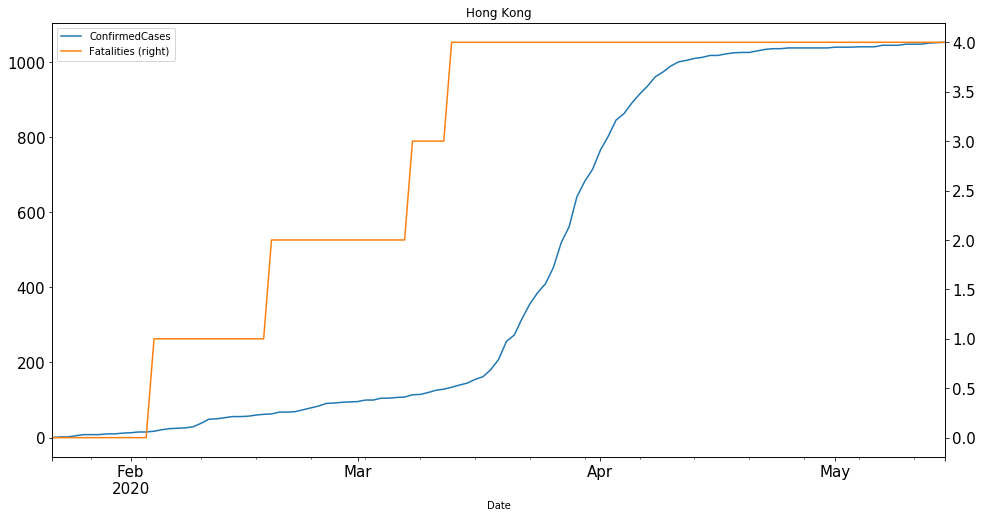

In [6]:
hk.plot(secondary_y='Fatalities',
        figsize=(16,8),
        title='Hong Kong',
        fontsize=15)
plt.show()

## 2) China

In [7]:
china = df_train[df_train['Country_Region']=='China']
china = china.groupby(china.index).sum()   # sum different provinces together

china.tail()

,ConfirmedCases,Fatalities
Date,,
2020-05-11,84011.0,4637.0
2020-05-12,84018.0,4637.0
2020-05-13,84024.0,4637.0
2020-05-14,84029.0,4637.0
2020-05-15,84038.0,4637.0


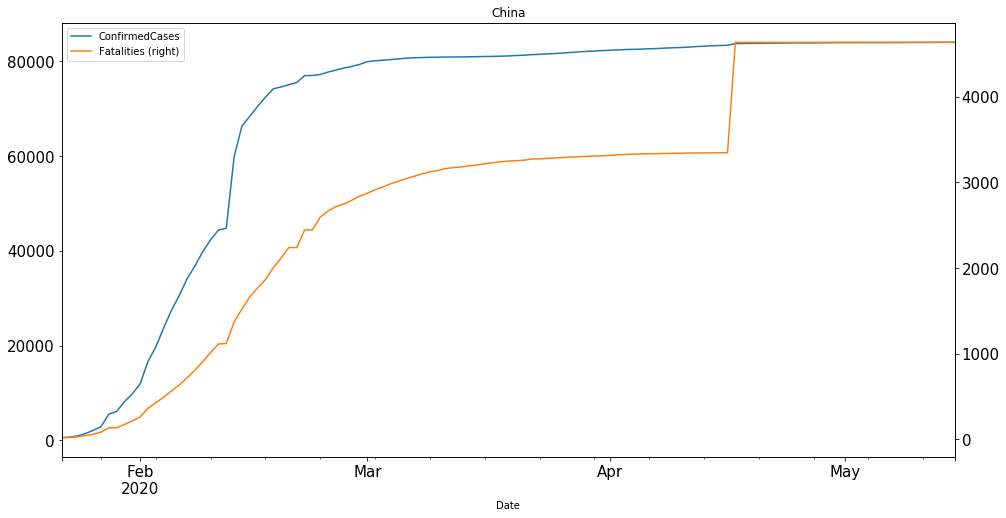

In [8]:
china.plot(secondary_y='Fatalities',
           figsize=(16,8),
           title='China',
           fontsize=15)
plt.show()

## 3) Taiwan

In [9]:
taiwan = df_train[df_train['Country_Region']=='Taiwan*'].drop(['Province_State', 'Country_Region'], axis=1)

taiwan.tail()

,ConfirmedCases,Fatalities
Date,,
2020-05-11,440.0,7.0
2020-05-12,440.0,7.0
2020-05-13,440.0,7.0
2020-05-14,440.0,7.0
2020-05-15,440.0,7.0


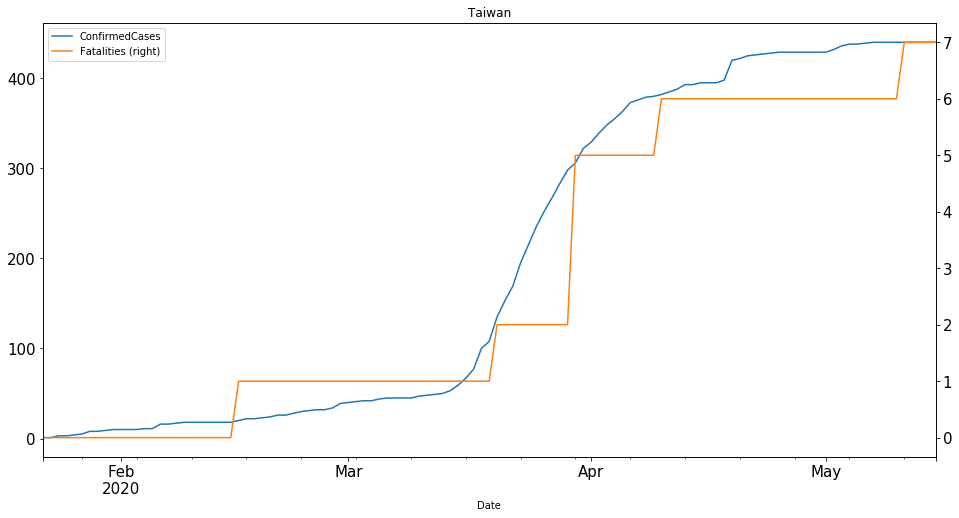

In [10]:
taiwan.plot(secondary_y='Fatalities',
           figsize=(16,8),
           title='Taiwan',
           fontsize=15)
plt.show()

## 4) Korea

In [11]:
korea = df_train[df_train['Country_Region']=='Korea, South'].drop(['Province_State', 'Country_Region'], axis=1)

korea.tail()

,ConfirmedCases,Fatalities
Date,,
2020-05-11,10936.0,258.0
2020-05-12,10962.0,259.0
2020-05-13,10991.0,260.0
2020-05-14,11018.0,260.0
2020-05-15,11037.0,262.0


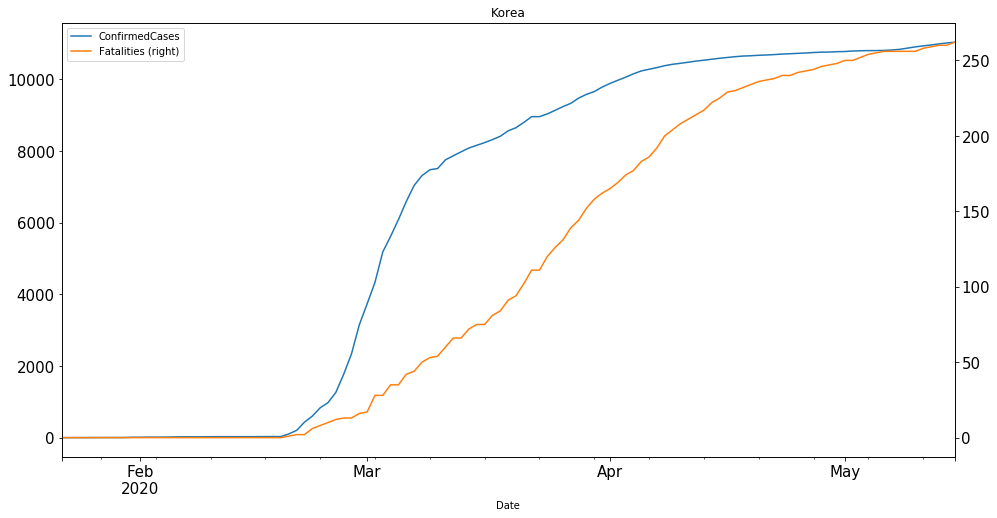

In [12]:
korea.plot(secondary_y='Fatalities',
           figsize=(16,8),
           title='Korea',
           fontsize=15)
plt.show()

## 5) Japan

In [13]:
japan = df_train[df_train['Country_Region']=='Japan'].drop(['Province_State', 'Country_Region'], axis=1)

japan.tail()

,ConfirmedCases,Fatalities
Date,,
2020-05-11,15847.0,633.0
2020-05-12,15968.0,657.0
2020-05-13,16049.0,678.0
2020-05-14,16120.0,697.0
2020-05-15,16203.0,713.0


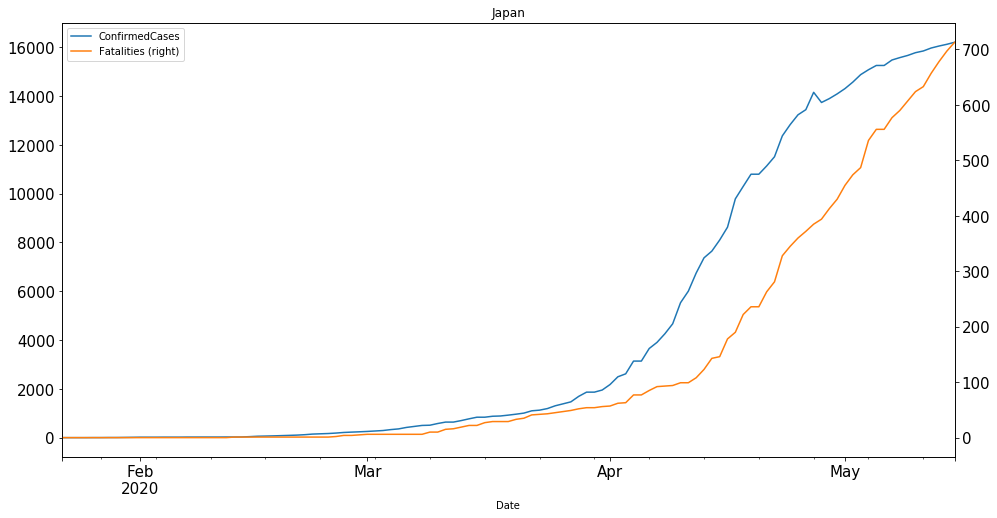

In [14]:
japan.plot(secondary_y='Fatalities',
           figsize=(16,8),
           title='Japan',
           fontsize=15)
plt.show()

## 6) Malaysia

In [15]:
malaysia = df_train[df_train['Country_Region']=='Malaysia'].drop(['Province_State', 'Country_Region'], axis=1)

malaysia.tail()

,ConfirmedCases,Fatalities
Date,,
2020-05-11,6726.0,109.0
2020-05-12,6742.0,109.0
2020-05-13,6779.0,111.0
2020-05-14,6819.0,112.0
2020-05-15,6855.0,112.0


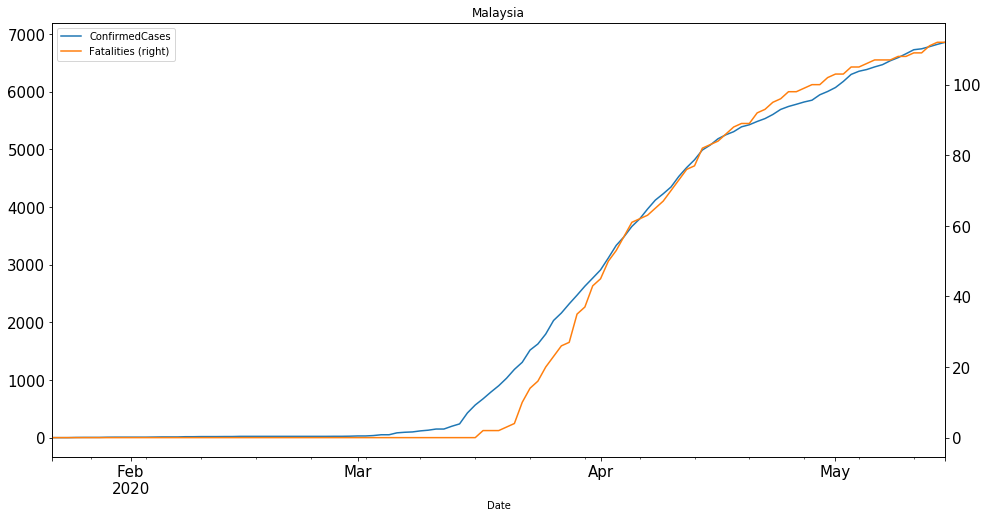

In [16]:
malaysia.plot(secondary_y='Fatalities',
           figsize=(16,8),
           title='Malaysia',
           fontsize=15)
plt.show()

## 7) Singapore

In [17]:
singapore = df_train[df_train['Country_Region']=='Singapore'].drop(['Province_State', 'Country_Region'], axis=1)

singapore.tail()

,ConfirmedCases,Fatalities
Date,,
2020-05-11,23822.0,21.0
2020-05-12,24671.0,21.0
2020-05-13,25346.0,21.0
2020-05-14,26098.0,21.0
2020-05-15,26891.0,21.0


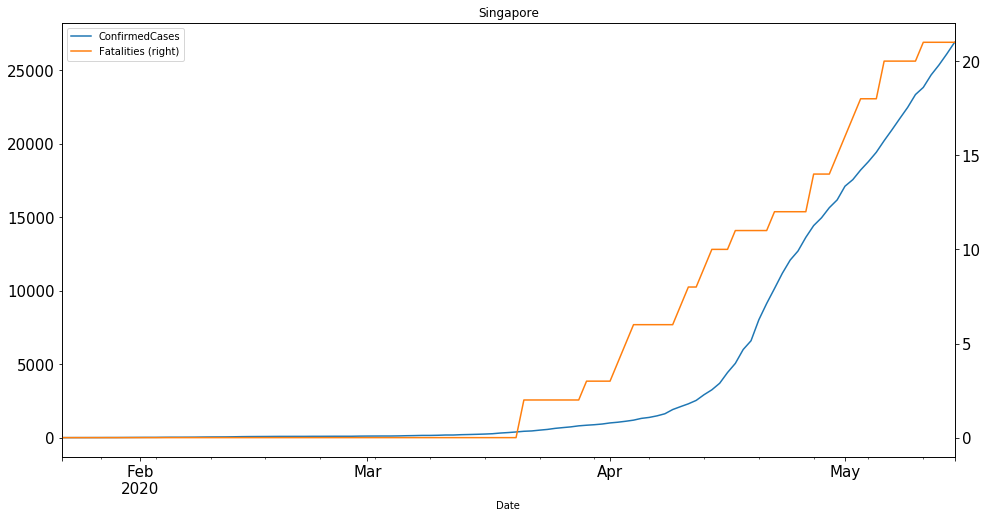

In [18]:
singapore.plot(secondary_y='Fatalities',
           figsize=(16,8),
           title='Singapore',
           fontsize=15)
plt.show()

---

# Overview

In [19]:
asia = {'Country': ['Hong Kong', 'China', 'Taiwan', 'Korea', 'Japan', 'Malaysia', 'Singapore'],
        'Population': [7496981, 1439323776, 23816775, 51269185, 126476461, 32318833, 5850342],
        'ConfirmedCases': [hk['ConfirmedCases'].iloc[-1], china['ConfirmedCases'].iloc[-1], taiwan['ConfirmedCases'].iloc[-1], korea['ConfirmedCases'].iloc[-1], japan['ConfirmedCases'].iloc[-1], malaysia['ConfirmedCases'].iloc[-1], singapore['ConfirmedCases'].iloc[-1]],
        'InfectedRate': [0,0,0,0,0,0,0],
        'Fatalities': [hk['Fatalities'].iloc[-1], china['Fatalities'].iloc[-1], taiwan['Fatalities'].iloc[-1], korea['Fatalities'].iloc[-1], japan['Fatalities'].iloc[-1], malaysia['Fatalities'].iloc[-1], singapore['Fatalities'].iloc[-1]],
        'DeathRate': [0,0,0,0,0,0,0],
       }

In [20]:
asia = pd.DataFrame(asia).set_index('Country')
asia['ConfirmedCases'] = asia['ConfirmedCases'].astype(int)
asia['Fatalities'] = asia['Fatalities'].astype(int)
asia['InfectedRate'] = asia['ConfirmedCases'] / asia['Population'] * 100
asia['DeathRate'] = asia['Fatalities'] / asia['ConfirmedCases'] * 100

asia

,Population,ConfirmedCases,InfectedRate,Fatalities,DeathRate
Country,,,,,
Hong Kong,7496981,1052,0.014032,4,0.380228
China,1439323776,84038,0.005839,4637,5.517742
Taiwan,23816775,440,0.001847,7,1.590909
Korea,51269185,11037,0.021528,262,2.373833
Japan,126476461,16203,0.012811,713,4.400420
Malaysia,32318833,6855,0.021211,112,1.633844
Singapore,5850342,26891,0.459648,21,0.078093


In [21]:
df_overview = pd.concat([hk.add_prefix('HongKong_'),
                         china.add_prefix('China_'),
                         taiwan.add_prefix('Taiwan_'),
                         korea.add_prefix('Korea_'),
                         japan.add_prefix('Japan_'),
                         malaysia.add_prefix('Malaysia_'),
                         singapore.add_prefix('Signapore_')],
                        axis=1)

ConfirmedCases_col = [col for col in df_overview.columns if 'ConfirmedCases' in col]
Fatalities_col = [col for col in df_overview.columns if 'Fatalities' in col]

df_overview_ConfirmedCases = df_overview[ConfirmedCases_col]
df_overview_Fatalities = df_overview[Fatalities_col]

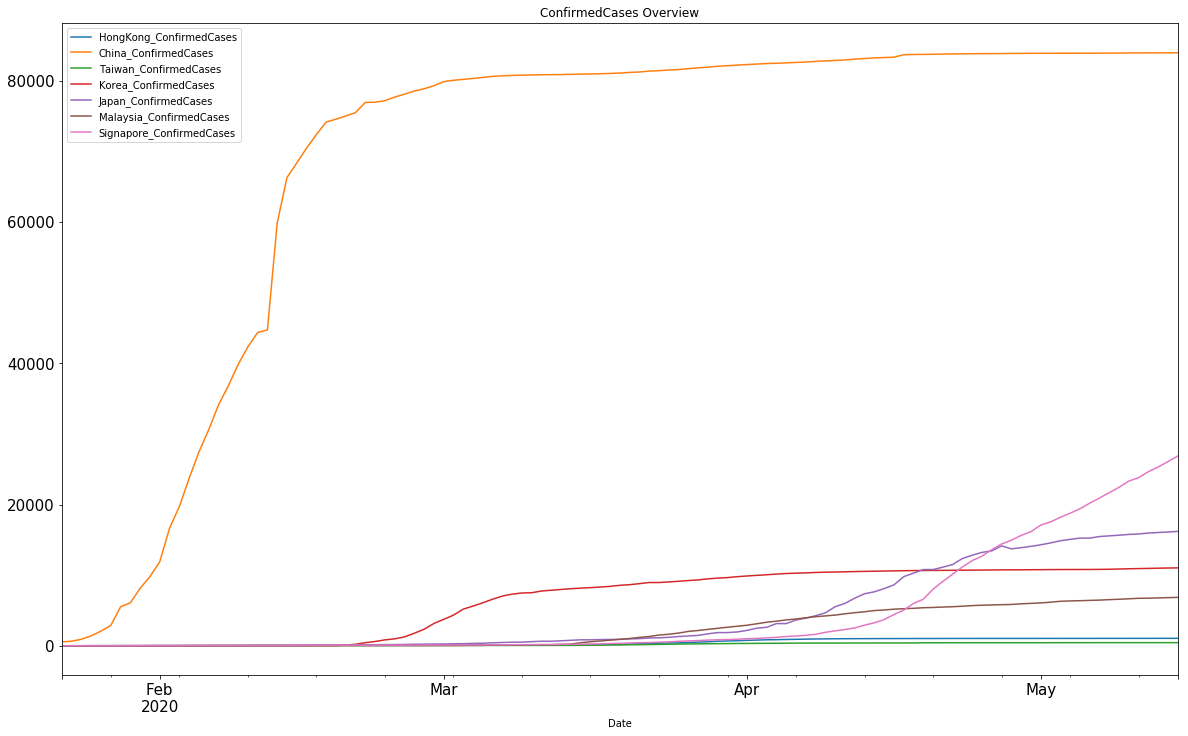

In [22]:
df_overview_ConfirmedCases.plot(figsize=(20,12),
                                title='ConfirmedCases Overview',
                                fontsize=15)
plt.show()

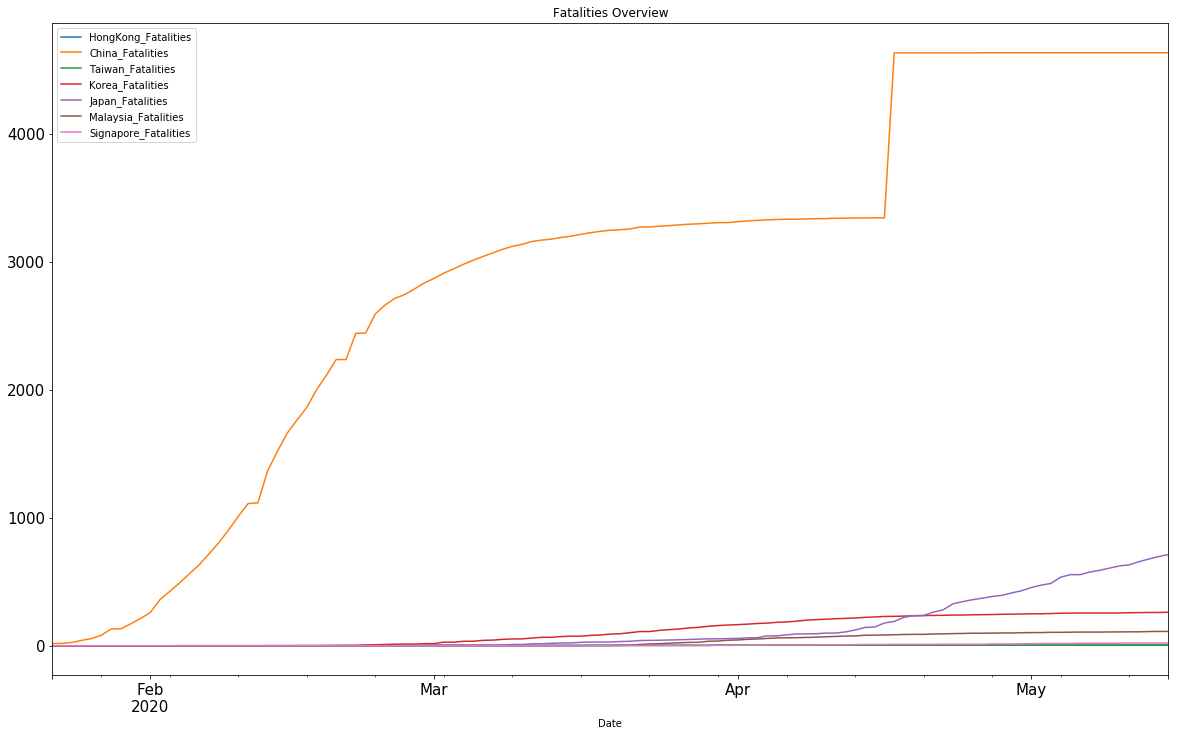

In [40]:
df_overview_Fatalities.plot(#ax=plt.gca(),
                            figsize=(20,12),
                            title='Fatalities Overview',
                            fontsize=15)
plt.show()